## Appendix F (Figure F.1-5)

In [1]:
dir_path = '/Users/jeremyzyang/Library/CloudStorage/GoogleDrive-jeremy.z.yang@gmail.com/My Drive/tiktok_revision'
setwd(dir_path)

In [2]:
load('tiktok.RData')
options(warn = -1)

In [3]:
suppressWarnings(suppressMessages(library(data.table)))
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(lfe)))
suppressWarnings(suppressMessages(library(patchwork)))
suppressWarnings(suppressMessages(library(zoo)))
suppressWarnings(suppressMessages(library(doParallel)))
suppressWarnings(suppressMessages(library(staggered)))
suppressWarnings(suppressMessages(library(fixest)))
suppressWarnings(suppressMessages(library(faux)))
suppressWarnings(suppressMessages(library(stargazer)))
suppressWarnings(suppressMessages(library(xgboost)))
suppressWarnings(suppressMessages(library(caret)))

In [4]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] caret_6.0-93      lattice_0.20-45   xgboost_1.6.0.1   stargazer_5.2.3  
 [5] faux_1.1.0        fixest_0.10.4     staggered_1.1     doParallel_1.0.17
 [9] iterators_1.0.14  foreach_1.5.2     zoo_1.8-11        patchwork_1.1.2  
[13] lfe_2.8-8         Matrix_1.5-1      forcats_0.5.2     stringr_1.4.1    
[17] dplyr_1.0.10      purrr_0.3.4       readr_2.1.3       tidyr_1.2.1      
[21] tibble_3.1.8      ggplot2_3.3.6     tidyverse_1.3.2   data.table_1.14.2

loaded via a names

In [5]:
ls()

[1] "dir_path"           "model_construction" "model_evaluation"  
[4] "search"

In [6]:
df = model_evaluation

In [7]:
df = df %>% group_by(taobao_id) %>% 
  mutate(treated_mean = mean(treated, na.rm = T))

df %>% distinct(taobao_id, .keep_all = T) %>%
  filter(treated_mean != 1) %>%
  pull(treated_mean) %>% table %>% sum

df_treat = filter(df, treated_mean != 1)
df_control = filter(df, treated_mean == 1)

treat_id = unique(df_treat$taobao_id)

[1] 259

#### Figure F.1

In [8]:
df_ss = df %>% 
group_by(video_full_id) %>% 
mutate(rev_avg = mean(rev)) %>% 
distinct(video_full_id, .keep_all = T)

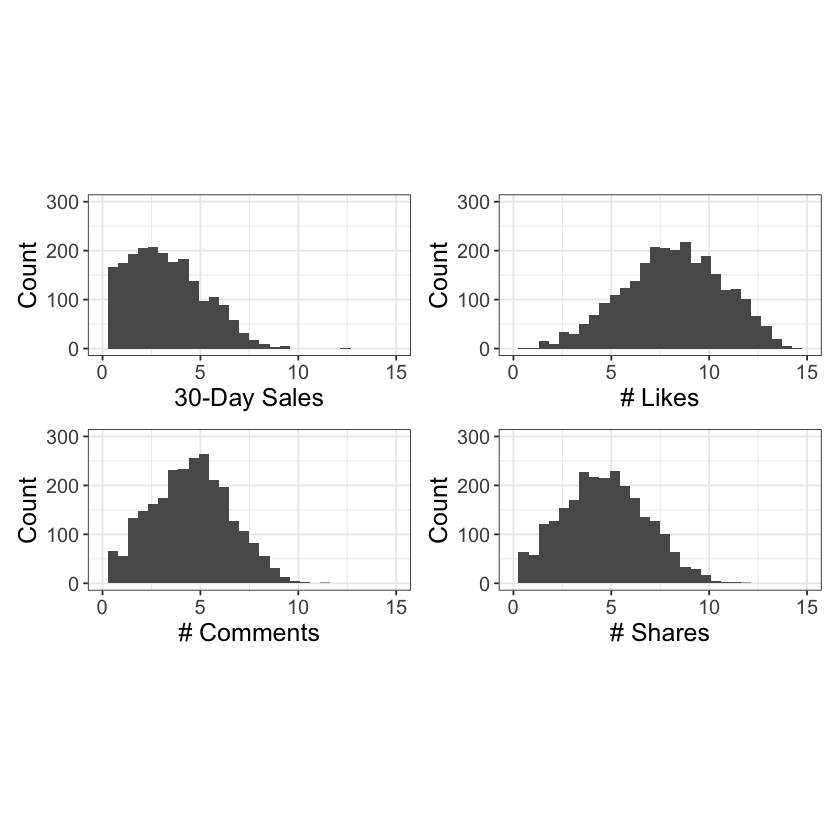

In [9]:
ggplot(aes(log(rev_avg)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('30-Day Sales') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(like)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15))+ xlab('# Likes') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(comment)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('# Comments') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

ggplot(aes(log(share)), data = df_ss) + geom_histogram(bins = 30) + theme_bw() +
theme(text = element_text(size=15)) + xlim(c(0,15)) + xlab('# Shares') + ylab('Count') + ylim(c(0,300)) + theme(aspect.ratio=2/4) +

plot_layout(ncol = 2)

#### Figure F.2

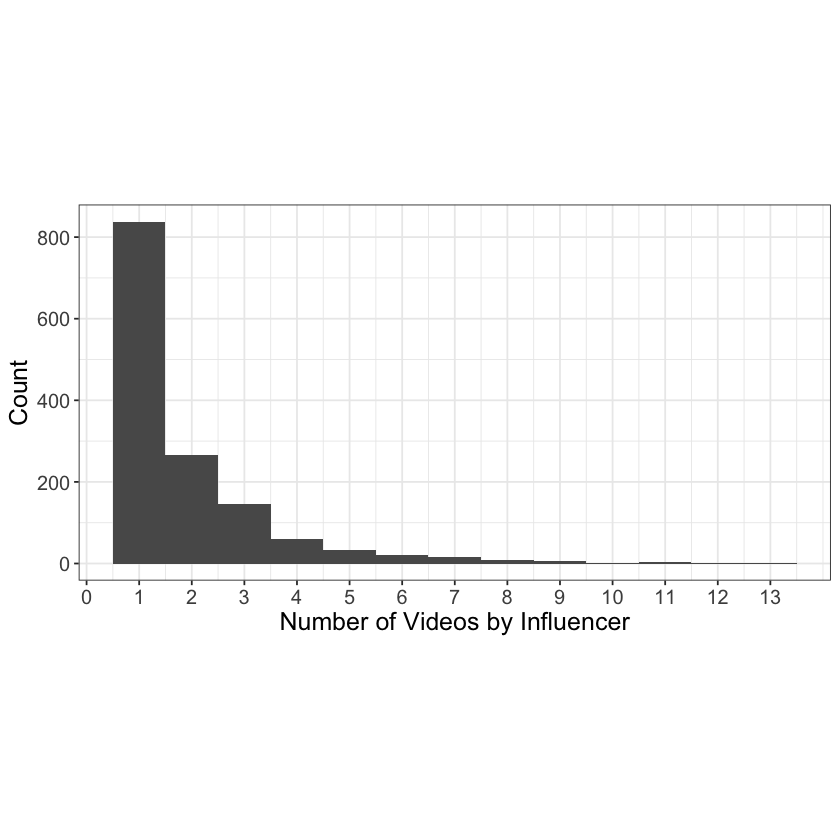

In [10]:
ggplot(aes(n_video), 
                            data = df_ss %>% 
                    group_by(true_id) %>% 
                    summarize(n_video = n())) + 
geom_histogram(binwidth = 1) + 
theme_bw() +
theme(text = element_text(size=15)) + 
scale_x_continuous(breaks = seq(0, 13, by = 1)) + 
ylab('Count') +
xlab('Number of Videos by Influencer') +
theme(aspect.ratio=2/4)

#### Figure F.3

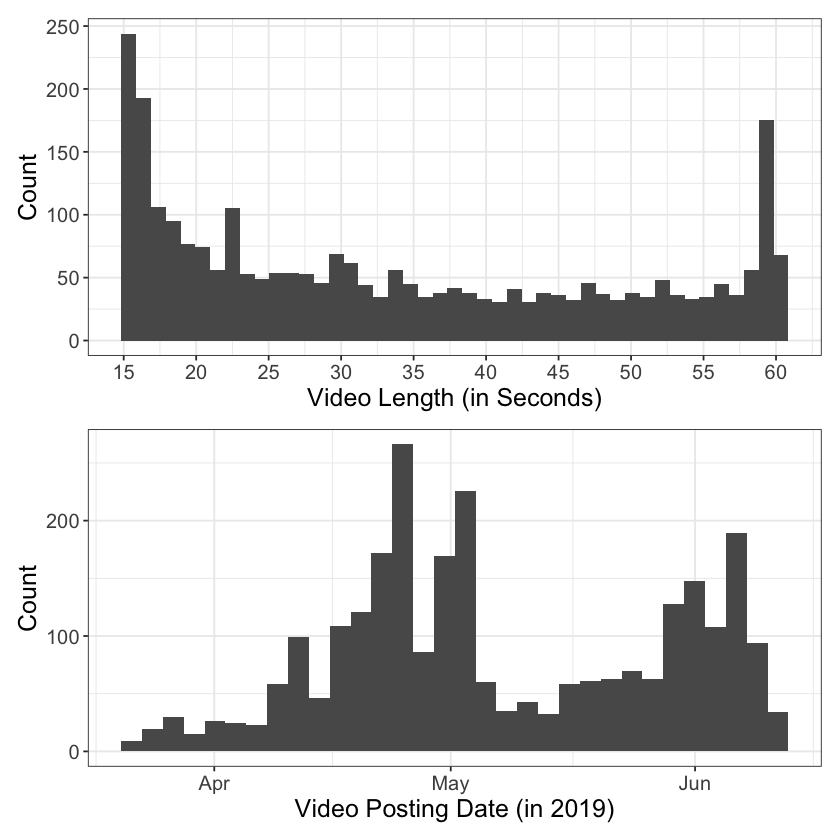

In [11]:
ggplot(aes(len), data = df_ss) + 
geom_histogram(bins = 45) + 
theme_bw() +
theme(text = element_text(size=15)) +
scale_x_continuous(breaks = seq(15, 60, by = 5)) + xlab('Video Length (in Seconds)') + ylab('Count') + 

ggplot(aes(video_posted_time), data = df_ss) + 
geom_histogram(bins = 228/7) + theme_bw() +
theme(text = element_text(size=15)) + xlab('Video Posting Date (in 2019)') + ylab('Count') +
scale_x_date(date_breaks = "1 month", date_labels = "%b") +

plot_layout(ncol = 1)

#### Figure F.4

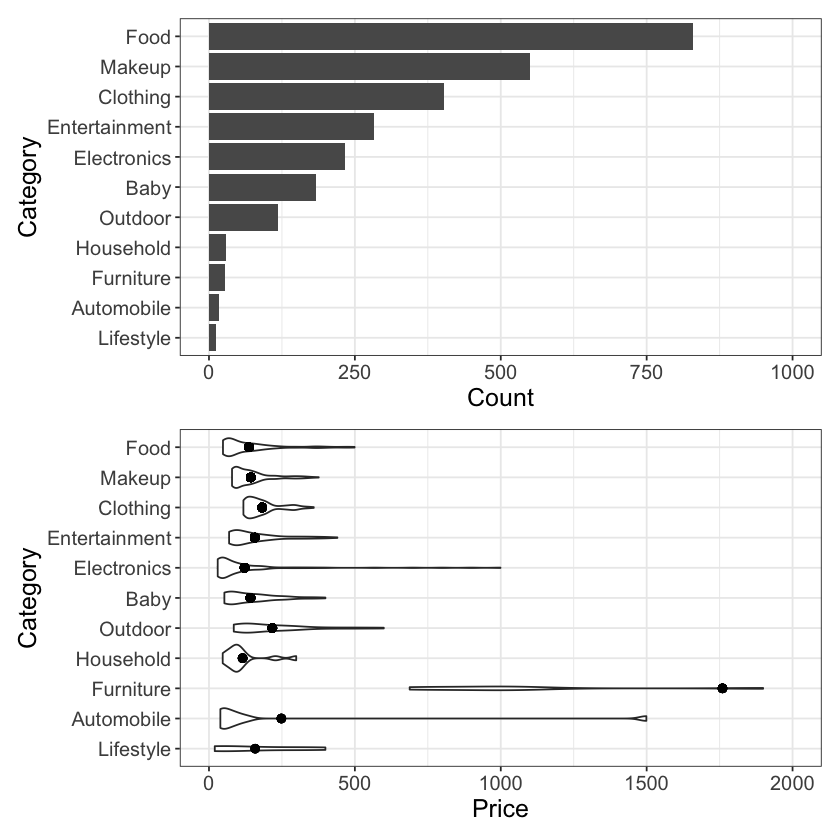

In [12]:
ggplot(aes(fct_rev(fct_infreq(category))), data = df_ss) +  geom_bar() + theme_bw() + 
theme(text = element_text(size=15)) + ylim(c(0,1000)) + xlab('Category') + ylab('Count') + coord_flip() +

ggplot(df_ss%>% 
group_by(category) %>%
filter(price <= quantile(price,0.95) & price >= quantile(price,0.5)) %>%
mutate(price_avg = mean(price), n = n()), 
               aes(x= reorder(category, n), 
                               y=price))  + geom_violin() + 
coord_flip() + 
theme_bw() + 
geom_point(aes(category, price_avg), size = 2) +
theme(text = element_text(size=15)) +
scale_y_continuous(limits = c(0,2000), 
                    breaks = seq(0, 2000, 500)) + xlab('Category') + ylab('Price') +

plot_layout(ncol = 1)

#### Figure F.5


	Pearson's product-moment correlation

data:  s2$like and s2$rev_diff
t = -0.12059, df = 257, p-value = 0.9041
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292924  0.1144714
sample estimates:
         cor 
-0.007522289 



	Pearson's product-moment correlation

data:  s2$comment and s2$rev_diff
t = -0.32743, df = 257, p-value = 0.7436
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1419556  0.1017216
sample estimates:
        cor 
-0.02042023 



	Pearson's product-moment correlation

data:  s2$share and s2$rev_diff
t = -0.11913, df = 257, p-value = 0.9053
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1292024  0.1145617
sample estimates:
         cor 
-0.007430714 


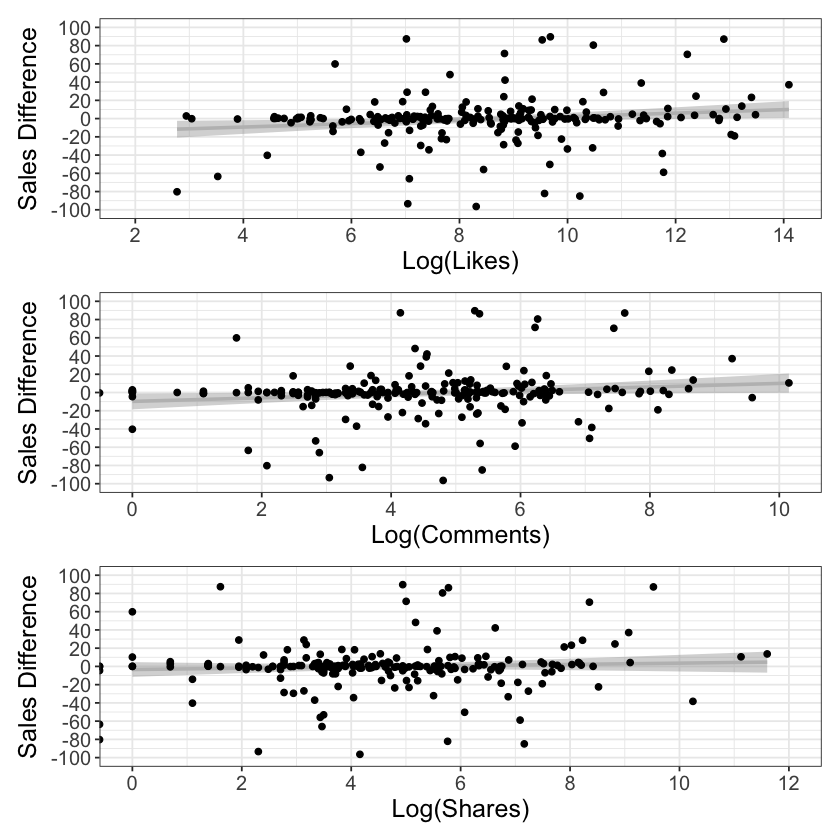

In [13]:
s = df_treat %>% 
  ungroup() %>%
  group_by(taobao_id, treated) %>% 
  mutate(
    avg_rev = mean(rev)
  ) %>%
  distinct(taobao_id, treated, .keep_all = T) %>%
  arrange(taobao_id) %>% 
  ungroup() %>%
  group_by(taobao_id) %>%
  mutate(count = n()) %>%
  filter(count == 2) %>%
  ungroup()

s = dcast(s, taobao_id ~ treated, value.var = c("avg_rev"))

s = left_join(s, df_treat %>% 
                distinct(taobao_id, .keep_all = T) %>%
                select(taobao_id, like, comment, share, pe_score), by ='taobao_id') 

t = df_treat %>% distinct(taobao_id, .keep_all = T) %>% select(taobao_id, video_posted_time)

s= left_join(s, t, by = 'taobao_id')
s$rev_diff = s[,3] - s[,2]

s2 = s %>% distinct(taobao_id, .keep_all = T)

g_like = ggplot(s2,
           aes(log(like), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Likes)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
    breaks=seq(0, 15, 2)
  ) 

cor.test(s2$like, s2$rev_diff)

g_comment = ggplot(s2,
           aes(log(comment), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Comments)') + 
  ylab('Sales Difference') + 
theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
      limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
    breaks=seq(0, 10, 2)
  ) 

cor.test(s2$comment, s2$rev_diff)

g_share = ggplot(s2,
           aes(log(share), rev_diff)) +
  geom_smooth(method = 'lm', color = 'grey', formula = y ~ x) +
  geom_point() +
  xlab('Log(Shares)') + 
  ylab('Sales Difference') + 
  theme_bw() +
  theme(text = element_text(size=15)) +
  scale_y_continuous(
            limits = c(-100,100),
          breaks=seq(-100, 100, 20)
  ) +
  scale_x_continuous(
      limits = c(0,12),
    breaks=seq(0, 12, 2)
  ) 

cor.test(s2$share, s2$rev_diff)

g_like/g_comment/g_share